In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#nlp=Natural language processing

In [2]:
flipkart_review = pd.read_csv('https://github.com/sukhioo7/Data-Science/blob/main/Machine%20Learning/NLP%20and%20Naive%20Bayes/Flipkart%20Review.csv?raw=true')

In [3]:
flipkart_review.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
flipkart_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [5]:
flipkart_review.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [6]:
flipkart_review.drop(['product_name','product_price'],axis=1,inplace=True)

<Axes: xlabel='Sentiment', ylabel='count'>

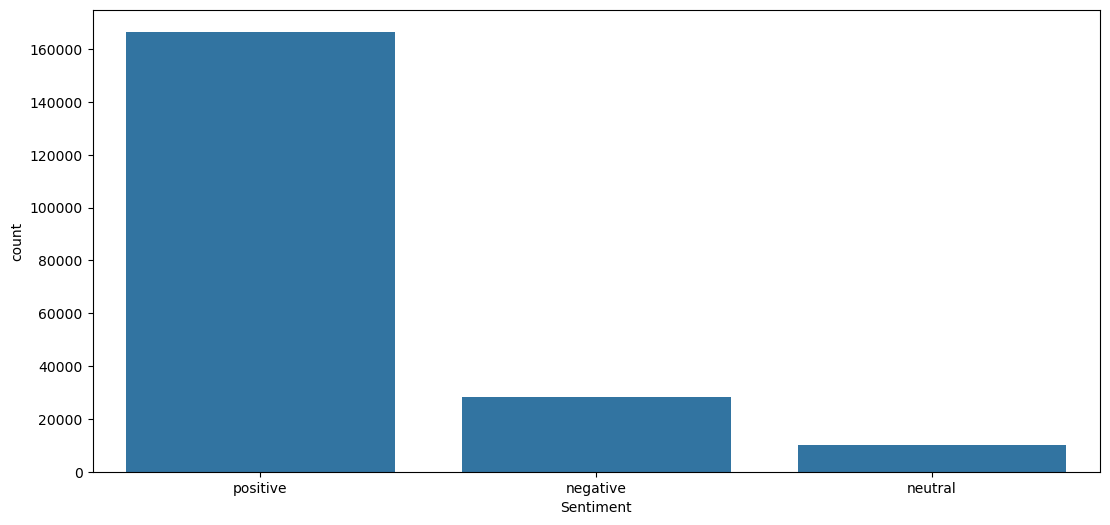

In [7]:
plt.figure(figsize=(13,6))
sns.countplot(data=flipkart_review,x='Sentiment')

In [8]:
flipkart_review.dropna(inplace=True)

In [9]:
flipkart_review.reset_index(drop=True,inplace=True)

In [10]:
flipkart_review.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


In [11]:
flipkart_review.isnull().sum()

Rate         0
Review       0
Summary      0
Sentiment    0
dtype: int64

In [12]:
def remove_space(review):
    review = review.replace(' ','')
    return [review]

In [13]:
flipkart_review['Review'] = flipkart_review['Review'].apply(remove_space)

In [14]:
flipkart_review['Rate'] = flipkart_review['Rate'].apply(lambda rate : [rate])

In [15]:
flipkart_review.head()

,Rate,Review,Summary,Sentiment
0,[5],[super!],great cooler excellent air flow and for this p...,positive
1,[5],[awesome],best budget 2 fit cooler nice cooling,positive
2,[3],[fair],the quality is good but the power of air is de...,positive
3,[1],[uselessproduct],very bad product its a only a fan,negative
4,[3],[fair],ok ok product,neutral


In [16]:
# steming = 
# apply steming on summary for removing the verb form

In [17]:
from nltk.stem.porter import PorterStemmer

harry_poter = PorterStemmer()

In [18]:
def convert_summary(summary):
    temp = []
    summary = summary.split()
    for word in summary:
        word = harry_poter.stem(word)
        temp.append(word)
    return temp

In [19]:
flipkart_review['Summary'].iloc[0]

'great cooler excellent air flow and for this price its so amazing and unbelievablejust love it'

In [20]:
flipkart_review['Summary'] = flipkart_review['Summary'].apply(convert_summary)

In [21]:
flipkart_review.head()

,Rate,Review,Summary,Sentiment
0,[5],[super!],"[great, cooler, excel, air, flow, and, for, th...",positive
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cool]",positive
2,[3],[fair],"[the, qualiti, is, good, but, the, power, of, ...",positive
3,[1],[uselessproduct],"[veri, bad, product, it, a, onli, a, fan]",negative
4,[3],[fair],"[ok, ok, product]",neutral


In [22]:
flipkart_review['Tag'] = flipkart_review['Rate'] + flipkart_review['Review'] +flipkart_review['Summary']

In [23]:
flipkart_review = flipkart_review[['Tag','Sentiment']]

In [24]:
flipkart_review['Tag'] = flipkart_review['Tag'].apply(lambda tag: ' '.join(tag))

In [25]:
flipkart_review.head()

,Tag,Sentiment
0,5 super! great cooler excel air flow and for t...,positive
1,5 awesome best budget 2 fit cooler nice cool,positive
2,3 fair the qualiti is good but the power of ai...,positive
3,1 uselessproduct veri bad product it a onli a fan,negative
4,3 fair ok ok product,neutral


In [26]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=300,stop_words='english')

In [28]:
count_vector.fit(flipkart_review['Tag'])

CountVectorizer(max_features=300, stop_words='english')

In [29]:
arr = count_vector.transform(flipkart_review['Tag']).toarray()

In [30]:
arr

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
arr.shape #this is x and y is sentiment

(180379, 300)

In [32]:
X = arr
Y = flipkart_review['Sentiment']

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [34]:
# Naive Bayes model is accurate 

In [35]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

naive_bayes = MultinomialNB()
naive_bayes1 = GaussianNB()
naive_bayes2 = BernoulliNB()

In [36]:
naive_bayes.fit(X_train,Y_train)
naive_bayes1.fit(X_train,Y_train)
naive_bayes2.fit(X_train,Y_train)

BernoulliNB()

In [37]:
predictions = naive_bayes.predict(X_test)
predictions1 = naive_bayes1.predict(X_test)
predictions2 = naive_bayes2.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      4887
     neutral       0.49      0.30      0.37      1731
    positive       0.95      0.97      0.96     29458

    accuracy                           0.92     36076
   macro avg       0.75      0.70      0.72     36076
weighted avg       0.91      0.92      0.91     36076



In [39]:
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

    negative       0.78      0.76      0.77      4887
     neutral       0.15      0.65      0.25      1731
    positive       0.98      0.80      0.88     29458

    accuracy                           0.79     36076
   macro avg       0.64      0.73      0.63     36076
weighted avg       0.91      0.79      0.83     36076



In [40]:
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

    negative       0.81      0.82      0.82      4887
     neutral       0.55      0.40      0.47      1731
    positive       0.96      0.97      0.96     29458

    accuracy                           0.92     36076
   macro avg       0.77      0.73      0.75     36076
weighted avg       0.92      0.92      0.92     36076



In [41]:
rate = 5
review ='Awesome'
summary = '''
Battery Monster more battery life than I expected
After using of 20 days,
good bass
Volume is good
Best built quality
Excellent battery
'''

In [42]:
tag = [str(rate)] + [review.replace(' ' ,'')] + summary.split()

In [43]:
tag

['5',
 'Awesome',
 'Battery',
 'Monster',
 'more',
 'battery',
 'life',
 'than',
 'I',
 'expected',
 'After',
 'using',
 'of',
 '20',
 'days,',
 'good',
 'bass',
 'Volume',
 'is',
 'good',
 'Best',
 'built',
 'quality',
 'Excellent',
 'battery']

In [44]:
tag = ' '.join(tag)

In [45]:
tag

'5 Awesome Battery Monster more battery life than I expected After using of 20 days, good bass Volume is good Best built quality Excellent battery'

In [46]:
tag = convert_summary(tag)

In [47]:
tag

['5',
 'awesom',
 'batteri',
 'monster',
 'more',
 'batteri',
 'life',
 'than',
 'i',
 'expect',
 'after',
 'use',
 'of',
 '20',
 'days,',
 'good',
 'bass',
 'volum',
 'is',
 'good',
 'best',
 'built',
 'qualiti',
 'excel',
 'batteri']

In [48]:
tag = ' '.join(tag)

In [49]:
tag

'5 awesom batteri monster more batteri life than i expect after use of 20 days, good bass volum is good best built qualiti excel batteri'

In [50]:
tag = pd.Series(tag)

In [51]:
tag

0    5 awesom batteri monster more batteri life tha...
dtype: object

In [52]:
data = count_vector.transform(tag).toarray()

In [53]:
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [54]:
naive_bayes.predict(data)

array(['positive'], dtype='<U8')

In [55]:
text=' '.join(list(flipkart_review[flipkart_review['Sentiment']=='positive']['Tag']))

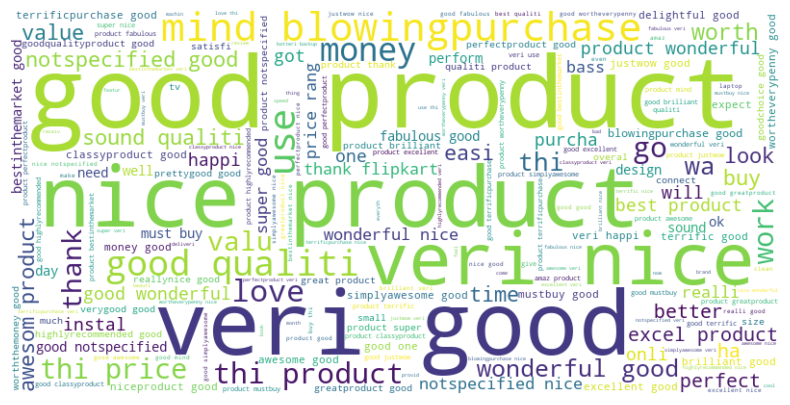

In [56]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()

In [57]:
text=' '.join(list(flipkart_review[flipkart_review['Sentiment']=='negative']['Tag']))

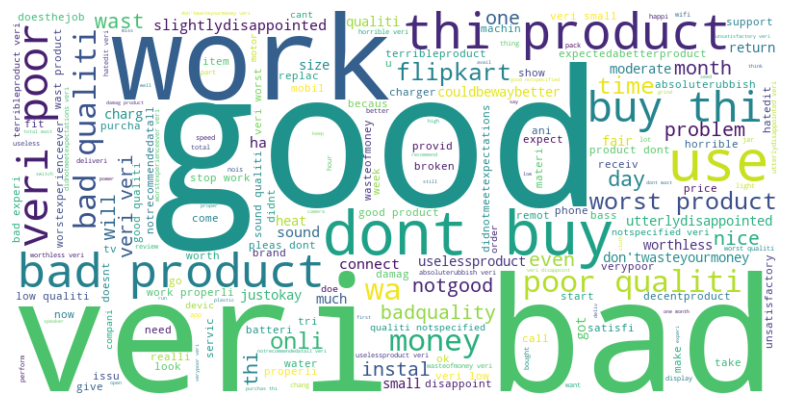

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()

In [59]:
text=' '.join(list(flipkart_review[flipkart_review['Sentiment']=='neutral']['Tag']))

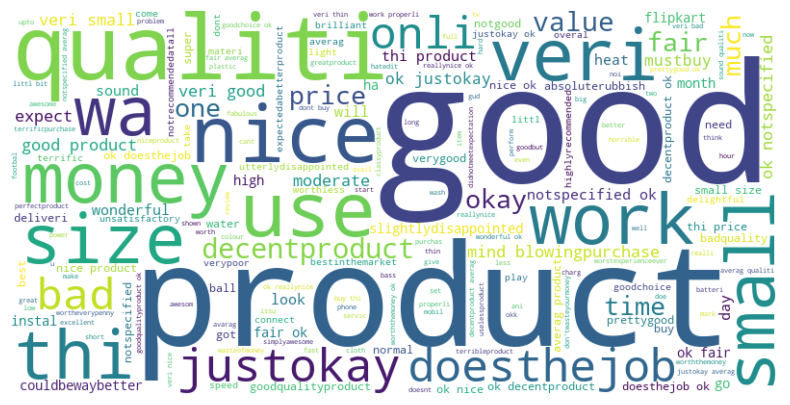

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()